In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error
import numpy as np

In [3]:
df = pd.read_csv('LASSO-data-set.csv')

In [6]:
x = df.copy()
x.drop('score', axis=1, inplace=True)

In [7]:
y = df.copy()
y = y.score

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state = 0)

In [40]:
reg = LassoCV().fit(x_train, y_train)

In [41]:
reg.alpha_

1.074923657765412

In [42]:
reg.alphas_

array([1.07492366e+03, 1.00247740e+03, 9.34913779e+02, 8.71903720e+02,
       8.13140327e+02, 7.58337390e+02, 7.07227988e+02, 6.59563189e+02,
       6.15110838e+02, 5.73654426e+02, 5.34992037e+02, 4.98935365e+02,
       4.65308791e+02, 4.33948536e+02, 4.04701857e+02, 3.77426306e+02,
       3.51989036e+02, 3.28266153e+02, 3.06142113e+02, 2.85509159e+02,
       2.66266798e+02, 2.48321307e+02, 2.31585282e+02, 2.15977209e+02,
       2.01421068e+02, 1.87845962e+02, 1.75185773e+02, 1.63378838e+02,
       1.52367651e+02, 1.42098581e+02, 1.32521613e+02, 1.23590100e+02,
       1.15260540e+02, 1.07492366e+02, 1.00247740e+02, 9.34913779e+01,
       8.71903720e+01, 8.13140327e+01, 7.58337390e+01, 7.07227988e+01,
       6.59563189e+01, 6.15110838e+01, 5.73654426e+01, 5.34992037e+01,
       4.98935365e+01, 4.65308791e+01, 4.33948536e+01, 4.04701857e+01,
       3.77426306e+01, 3.51989036e+01, 3.28266153e+01, 3.06142113e+01,
       2.85509159e+01, 2.66266798e+01, 2.48321307e+01, 2.31585282e+01,
      

In [43]:
predict = reg.predict(x_test)

Text(0.5, 1.0, 'Predicted vs Test Values')

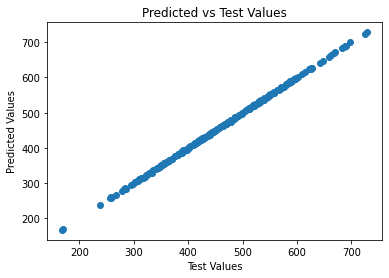

In [44]:
plt.scatter(y_test, predict)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Test Values')

In [45]:
residuals = predict-y_test

Text(0.5, 1.0, 'Residuals vs Predicted Values')

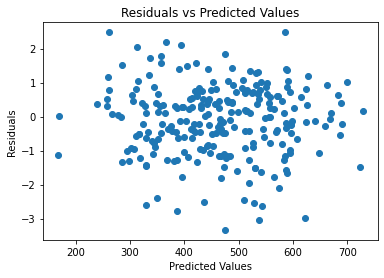

In [46]:
plt.scatter(predict, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

In [47]:
reg.score(x_test, y_test)

0.9999091681500318

In [48]:
median_absolute_error(y_test, predict)

0.6512845529578044

In [42]:
reg.coef_

array([ 0.00000000e+00, -6.72175977e-04, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.37513507e-03,  3.97959505e+00, -4.99272206e+00,
        0.00000000e+00,  0.00000000e+00,  1.98746470e-02,  5.97764196e+00,
       -0.00000000e+00, -6.06142817e-03, -0.00000000e+00, -6.86831157e+00])

In [43]:
reg.intercept_

-66.22924695707843

In [58]:
regL = LinearRegression().fit(x_train, y_train)
regL.score(x_test, y_test)

0.999916814568704

In [59]:
predictL = regL.predict(x_test)

Text(0.5, 1.0, 'Linear Regression: Predicted vs Actual Values')

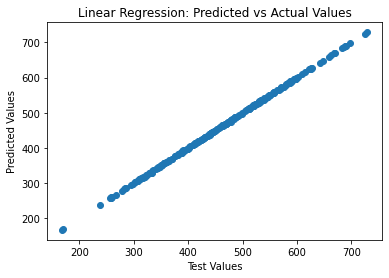

In [62]:
plt.scatter(y_test, predictL)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual Values')

Text(0.5, 1.0, 'Linear Regression Resdual Plot')

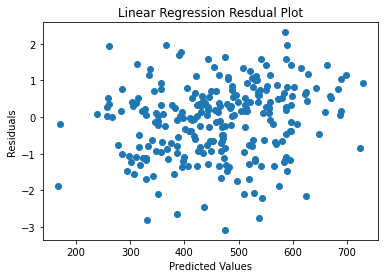

In [65]:
residuals = predictL - y_test
plt.scatter(predictL, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression Resdual Plot')

In [66]:
median_absolute_error(y_test, predictL)

0.6903263322636519

In [67]:
regL.coef_

array([-4.63360466e-03, -1.29891462e-03,  6.30686633e-03,  7.44404105e-05,
        1.66508660e-04,  1.71831565e-04,  4.00795402e+00, -5.01123757e+00,
       -1.23496908e-02, -1.97063709e-03,  9.61775544e-03,  6.00896919e+00,
        9.34354856e-03, -6.32294101e-03,  2.38040866e-02, -7.00771148e+00])